In [1]:
# Logistic Regression is a classification model, not a regression model 
# (confusing name)

In [2]:
# Logistic Regression is used for Binary classification

In [3]:
import pandas as pd

df = pd.read_csv('3_data.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [5]:
df.corrwith(df.left)

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
dtype: float64

In [6]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [7]:
# df.corr() gives all the correlations
# df.corrwith() gives correlation of all columns with specified columns

In [8]:

%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
df.groupby(df.left).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

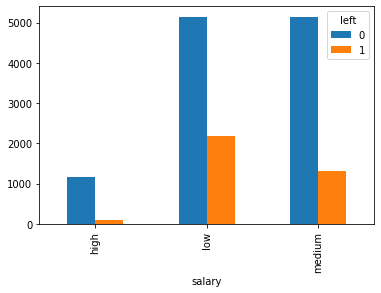

In [10]:
pd.crosstab(df.salary, df.left).plot(kind="bar")

In [11]:
pd.crosstab(df.salary, df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='Department'>

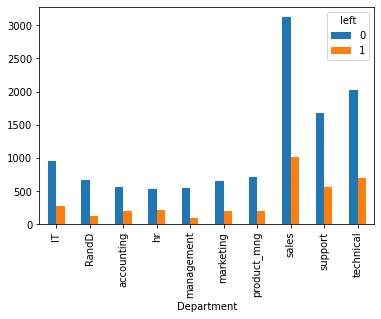

In [12]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [13]:
# To analyse numeric data, we use groupby(df.left).mean()
# To analyse other data, we used pd.crosstab().plot(kind="bar")

In [14]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [15]:
dums = pd.get_dummies(df.salary)

In [16]:
sdf = pd.concat([subdf, dums], axis=1)

In [17]:
sdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [18]:
sdf = sdf.drop(['salary', 'medium'], axis=1)
sdf

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = sdf
y = df.left

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.7753166901251944 0.7826666666666666


In [22]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [23]:
pd.crosstab(df.salary, df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [24]:
# First argument of crosstab is put rowwise, second argument is put columnwise
# and it creates a table to analyse the data

## pd.crosstab() is VVIP

In [25]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [26]:
pd.crosstab(df.Department, df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [27]:
pd.crosstab(df.Department, df.salary)

salary,high,low,medium
Department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<AxesSubplot:xlabel='Department'>

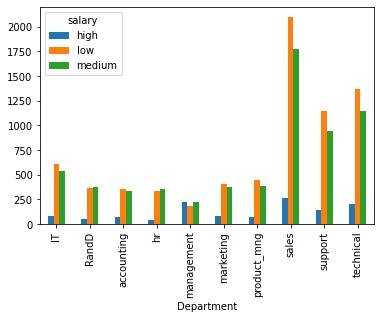

In [28]:
pd.crosstab(df.Department, df.salary).plot(kind='bar')

In [29]:
# pd's crosstab helps create a "CONTINGENCY" table

In [30]:
df = pd.read_csv('3_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [46]:
group = df.groupby(['left', 'salary'])

In [48]:
group.mean()

satisfaction_level  last_evaluation  number_project  \
left salary                                                        
0    high              0.651879         0.708606        3.789610   
     low               0.668103         0.717028        3.784603   
     medium            0.668875         0.715461        3.788068   
1    high              0.434512         0.644024        3.451220   
     low               0.441248         0.716994        3.836096   
     medium            0.438550         0.724571        3.912680   

             average_montly_hours  time_spend_company  Work_accident  \
left salary                                                            
0    high              200.348052            3.693506       0.166234   
     low               198.617418            3.253888       0.183709   
     medium            199.214272            3.435952       0.168259   
1    high              193.097561            3.682927       0.000000   
     low               206.631215            3.874770       0.043738   
     medium            209.610478            3.891420       0.056188   

             promotion_last_5years  
left salary                         
0    high                 0.062338  
     low                  0.010109  
     medium               0.034315  
1    high                 0.000000  
     low                  0.006446  
     medium               0.003797